In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ackley(x):
    a = 20
    b = 0.2
    c = 1
    return (
        -a * np.exp(-b * np.sqrt(np.sum(x**2) / len(x)))
        - np.exp(np.sum(np.cos(c * x)) / len(x))
        + a
        + np.e
    )

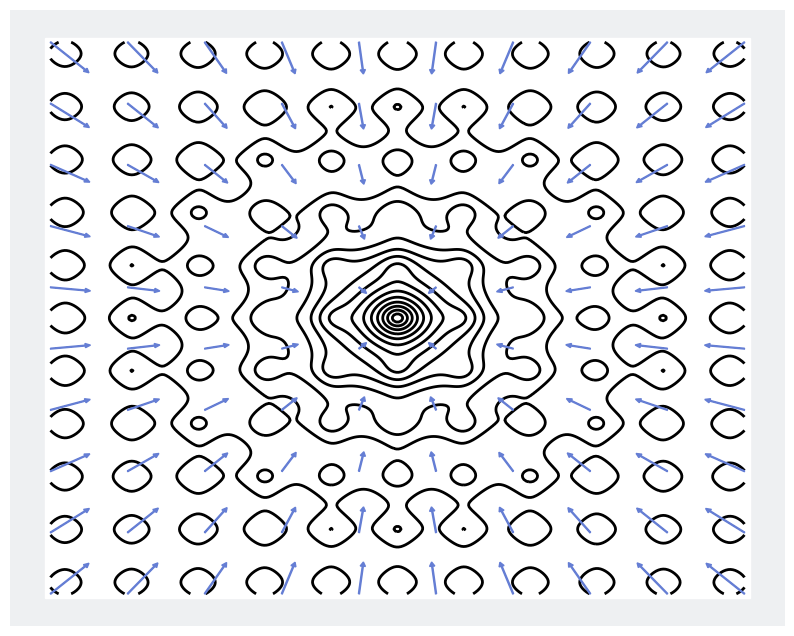

In [3]:
import numpy as np
import matplotlib.pyplot as plt

bounds = np.array([[-32.768, 32.768], [-32.768, 32.768]])

fig, ax = plt.subplots(figsize=(10, 8))

x = np.linspace(bounds[0, 0], bounds[0, 1], 10)
y = np.linspace(bounds[1, 0], bounds[1, 1], 10)
X, Y = np.meshgrid(x, y)

arrow_c = np.array([101, 126, 212]) / 255.0


for x, y in zip(X.flatten(), Y.flatten()):
    ax.arrow(x, y, -x/10, -y/10,
             width=0.1, head_width=0.5, head_length=0.5,
             fc=arrow_c, ec=arrow_c, zorder=3)

x = np.linspace(bounds[0, 0], bounds[0, 1], 300)
y = np.linspace(bounds[1, 0], bounds[1, 1], 300)
X, Y = np.meshgrid(x, y)
Z = np.array([ackley(np.array([x, y])) for x, y in zip(X.flatten(), Y.flatten())])
Z = Z.reshape(X.shape)

ax.contour(X, Y, Z, levels=20, linewidths=2, colors="black", zorder=2)

ax.add_patch(plt.Rectangle((-32.768-0.5, -32.768-0.5),
                            32.768*2+1, 32.768*2+1,
                            color="white", zorder=1))

ax.set_facecolor("#eef0f2")

ax.set_xticks([])
ax.set_yticks([])
ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)

plt.savefig("../static_files/ackley_contour.svg",
            bbox_inches="tight",
            pad_inches=0)